# Memanggil Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('DataLatihanNRP4.csv','sep',';')

In [14]:
data.shape

(300, 15)

In [16]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,38,Private,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,40,Private,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,46,Federal-gov,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,35,Private,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K


# Deteksi Missing Value

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    296 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [18]:
Y = ['type']
X_int = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [19]:
data_Y = data[Y]
data_int = data[X_int].astype(float)
data_cat = data[X_cat]

In [21]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


# Input Missing Value

In [23]:
data_int_array = []
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_int_1 = data_int[data_Y['type']==class_name]
    data_int_clean_1 = data_int_1.fillna(data_int_1.mean().astype(int))
    data_int_array.append(data_int_clean_1)

    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [25]:
data_int_clean = pd.concat(data_int_array)
data_cat_clean = pd.concat(data_cat_array)

# Standardize Data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
data['age'] = StandardScaler().fit(data[['age']]).transform(data[['age']])
data['fnlwgt'] = StandardScaler().fit(data[['fnlwgt']]).transform(data[['fnlwgt']])
data['education-num'] = StandardScaler().fit(data[['education-num']]).transform(data[['education-num']])
data['capital-gain'] = StandardScaler().fit(data[['capital-gain']]).transform(data[['capital-gain']])
data['capital-loss'] = StandardScaler().fit(data[['capital-loss']]).transform(data[['capital-loss']])
data['hours-per-week'] = StandardScaler().fit(data[['hours-per-week']]).transform(data[['hours-per-week']])

In [31]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,0.0,Local-gov,0.0,Bachelors,0.0,Divorced,Prof-specialty,Unmarried,White,Female,-0.301511,-0.204124,0.0,United-States,<=50K
1,0.0,Private,0.0,Bachelors,0.0,Married-civ-spouse,Sales,Husband,White,Male,3.316625,-0.204124,0.0,United-States,>50K
2,0.0,Private,0.0,HS-grad,0.0,Never-married,Other-service,Not-in-family,White,Female,-0.301511,-0.204124,0.0,United-States,<=50K
3,0.0,Federal-gov,0.0,HS-grad,0.0,Divorced,Adm-clerical,Not-in-family,White,Male,-0.301511,-0.204124,0.0,United-States,<=50K
4,0.0,Private,0.0,Assoc-acdm,0.0,Never-married,Exec-managerial,Not-in-family,White,Female,-0.301511,-0.204124,0.0,United-States,<=50K


# Deteksi Outlier

In [32]:
#deteksi outlier
data_num_w_class = pd.concat([data_int_clean, data_Y], axis=1)

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

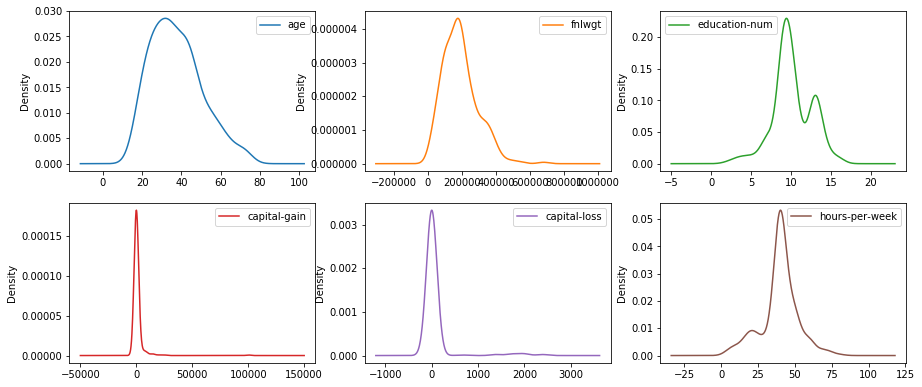

In [34]:
data_num_w_class.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

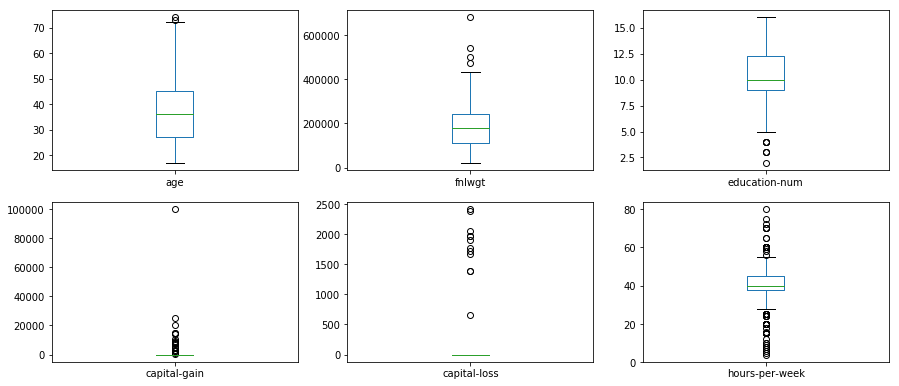

In [35]:
data_num_w_class.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [41]:
colors_palette = {" <=50K": "blue",  " >50K": "yellow"}
colors = [colors_palette[c] for c in data_num_w_class['type']]

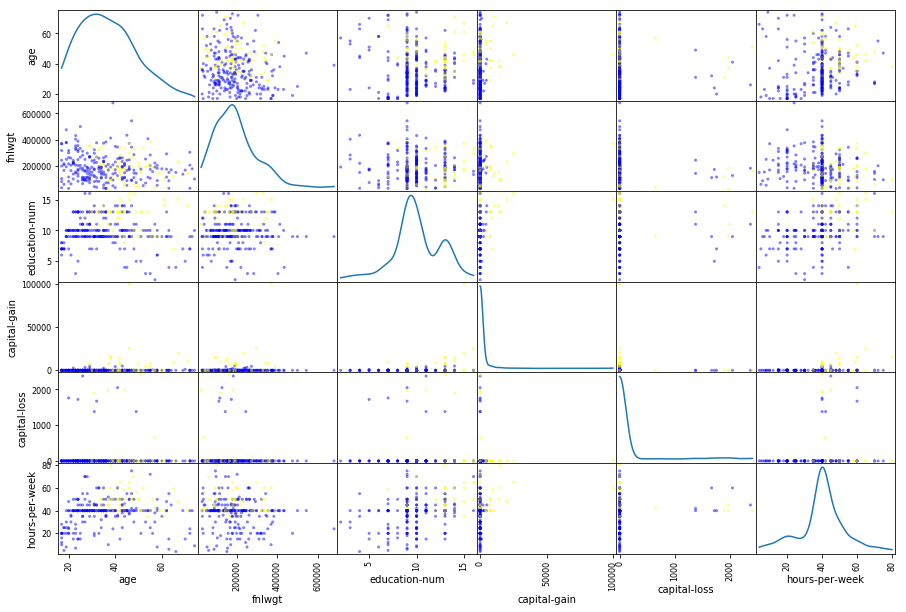

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num_w_class, color=colors, diagonal='kde')
plt.show()

In [43]:
data_cleaned = pd.concat([data_num_w_class, data_cat_clean], axis=1)

# Save Data

In [45]:
data_cleaned.to_csv('Data_LatihanNRP4_full_cleaned.csv', index=0)